<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>Machine Learning | Under Birthweight Infant Analysis</h2>
</h4><br>Mengting Lin<br></h4>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [1]:
# importing libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import statsmodels.formula.api as smf
import sklearn.linear_model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './birthweight_low.xlsx'

# reading the file into Python
birthweight = pd.read_excel(io         = file,
                            header     = 0,
                            sheet_name = 0)

In [2]:
# looping to detect features with missing values
for col in birthweight:

    # creating columns with 1s if missing and 0 if not
    if birthweight[col].isnull().astype(int).sum() > 0:
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
birthweight[    ['m_meduc', 'm_npvis', 'm_feduc']    ].sum(axis = 0)


m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64


________________________________________

Missing values for meduc: False
Missing values for npvis: False
Missing values for feduc: False
________________________________________




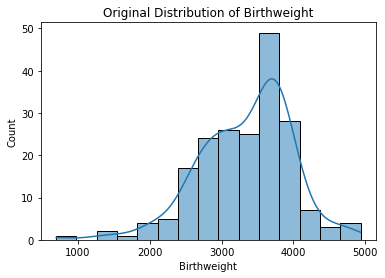

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     10.68
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           3.27e-10
Time:                        21:58:32   Log-Likelihood:                -1517.5
No. Observations:                 196   AIC:                             3049.
Df Residuals:                     189   BIC:                             3072.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4255.5804    408.891     10.408      0.0

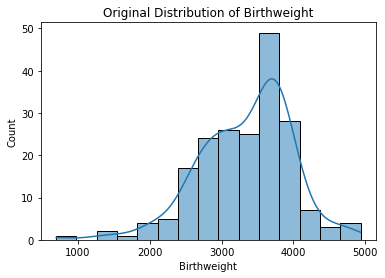

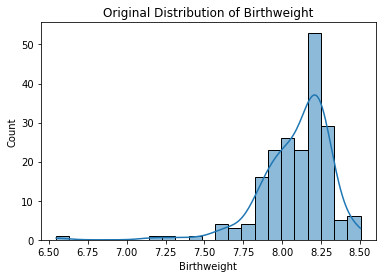

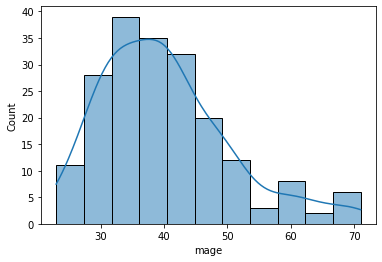

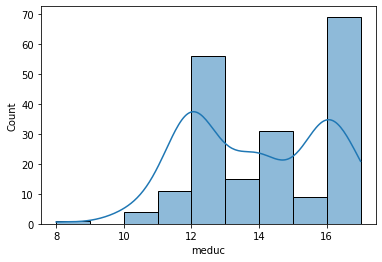

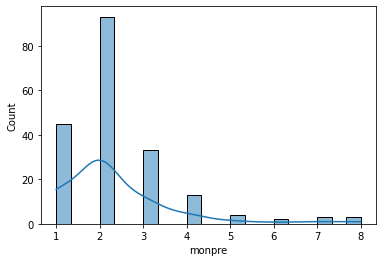

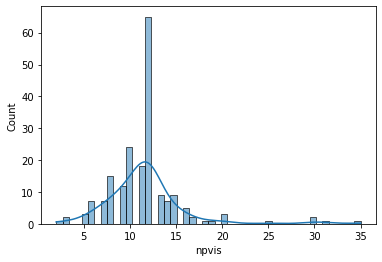

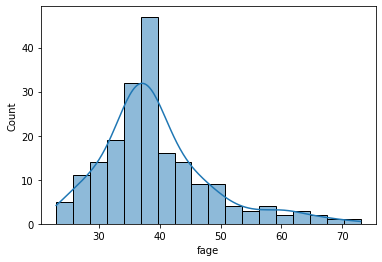

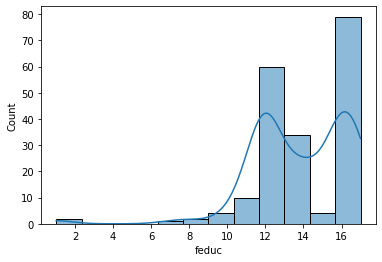

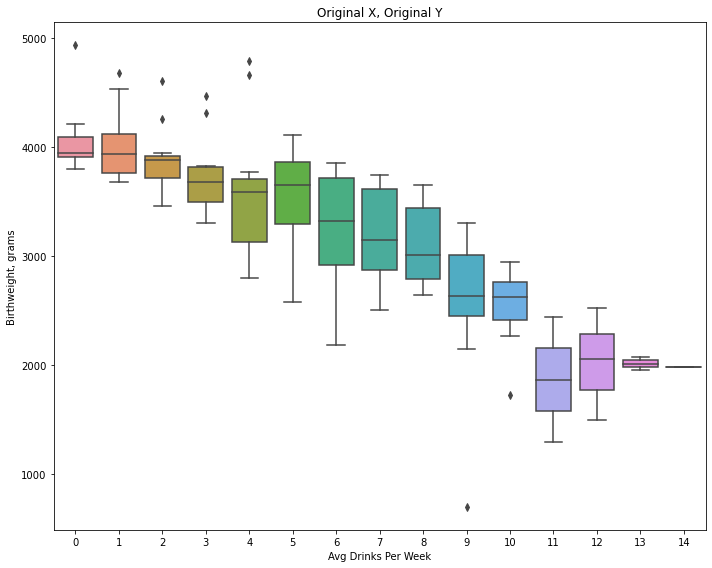

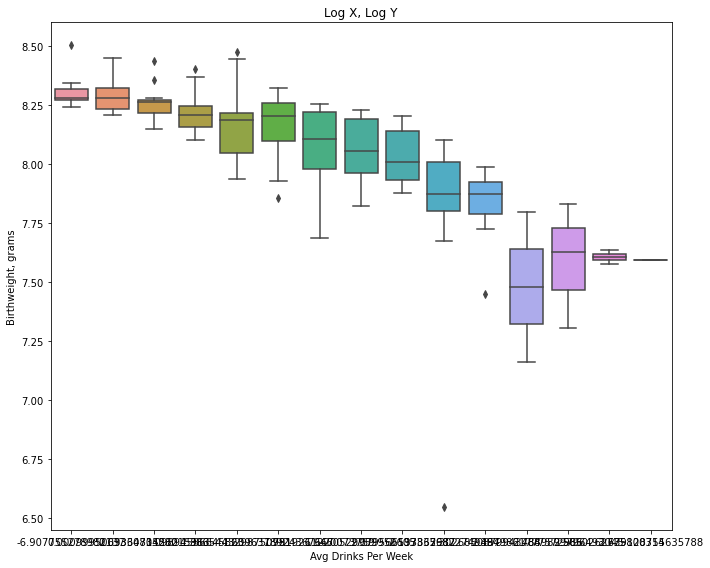

bwght        1.00
log_bwght    0.97
omaps        0.25
fmaps        0.25
feduc        0.13
mblck        0.13
fblck        0.12
male         0.11
meduc        0.09
npvis        0.06
m_npvis      0.06
m_feduc     -0.00
moth        -0.02
fwhte       -0.04
monpre      -0.05
foth        -0.08
mwhte       -0.11
m_meduc     -0.13
fage        -0.40
log_drink   -0.44
mage        -0.46
cigs        -0.57
drink       -0.74
Name: bwght, dtype: float64

Training Data
-------------
X-side: (147, 4)
y-side: (147,)


Testing Data
------------
X-side: (49, 4)
y-side: (49,)

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     91.84
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.14e-38
Time:                        21:58:34   Log

/Users/mengtinglin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/mengtinglin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default

In [3]:
# soft coding MEDIAN for meduc
meduc_median = birthweight['meduc'].median()


# filling carat NAs with MEDIAN
birthweight['meduc'].fillna(value = meduc_median,
                          inplace = True)


# soft coding MEAN for npvis
npvis_mean = birthweight['npvis'].mean()


# filling carat NAs with MEAN
birthweight['npvis'].fillna(value = npvis_mean,
                          inplace = True)


# soft coding MEDIAN for feduc
feduc_median = birthweight['feduc'].median()


# filling carat NAs with MEDIAN
birthweight['feduc'].fillna(value = feduc_median,
                          inplace = True)


# checking to make sure NAs are filled in
print(f"""
{'_' * 40}

Missing values for meduc: {birthweight['meduc'].isnull().any()}
Missing values for npvis: {birthweight['npvis'].isnull().any()}
Missing values for feduc: {birthweight['feduc'].isnull().any()}
{'_' * 40}

""")

# developing a histogram using HISTPLOT
sns.histplot(data  = birthweight,
             x     = "bwght",
             kde   = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight")
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

# creating a list of continuous features (including Birthweight)
continuous_data = ['bwght','mage','meduc','monpre','npvis','fage','feduc']


# developing a correlation matrix based on continuous features
bwght_corr = birthweight[continuous_data].corr(method = 'pearson')

# filtering the results to only show correlations with Birthweight
bwght_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)


# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """bwght ~ mage + 
                                           meduc +
                                           monpre +
                                           npvis +
                                           fage +
                                           feduc""",
                         data = birthweight)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())



# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = "bwght",
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# log transforming Sale_Price and saving it to the dataset
birthweight['log_bwght'] = np.log(birthweight['bwght'])


# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = "log_bwght",
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# histogram for mage (skewed positive)
sns.histplot(data   = birthweight,
             x      = 'mage',
             kde    = True)


# rendering the plot
plt.show()


# histogram for meduc (skewed negative)
sns.histplot(data   = birthweight,
             x      = 'meduc',
             kde    = True)


# rendering the plot
plt.show()

# histogram for monpre (skewed positive)
sns.histplot(data   = birthweight,
             x      = 'monpre',
             kde    = True)


# rendering the plot
plt.show()

# histogram for npvis (skewed positive)
sns.histplot(data   = birthweight,
             x      = 'npvis',
             kde    = True)


# rendering the plot
plt.show()

# histogram for fage (skewed positive)
sns.histplot(data   = birthweight,
             x      = 'fage',
             kde    = True)


# rendering the plot
plt.show()

# histogram for feduc (skewed negative)
sns.histplot(data   = birthweight,
             x      = 'feduc',
             kde    = True)


# rendering the plot
plt.show()


## comparing log transformation results ##

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


## Plot 1: Original X, Original Y ##
sns.boxplot(x     = 'drink',
            y     = 'bwght',
            data  = birthweight)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'Avg Drinks Per Week')
plt.ylabel(ylabel = 'Birthweight, grams')


## displaying the visual ##
plt.tight_layout()
plt.show()


# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# log transforming drink and saving it to the dataset
birthweight['log_drink'] = np.log(birthweight['drink'] + 0.001)

## Plot 2: Log X, Log Y ##
sns.boxplot(x     = birthweight['log_drink'],
            y     = birthweight['log_bwght'],
            data  = birthweight)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'Avg Drinks Per Week')
plt.ylabel(ylabel = 'Birthweight, grams')


## displaying the visual ##
plt.tight_layout()
plt.show()

# creating a (Pearson) correlation matrix
df_corr = birthweight.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['bwght'].sort_values(ascending = False))


birthweight['cigover20'] = 0
for index, value in birthweight.iterrows():
    if birthweight.loc[index, 'cigs'] > 20 :
        birthweight.loc[index,'cigover20'] = 1
        
        
        # declaring set of x-variables
x_variables = [ 'mage', 'cigs', 'drink','cigover20']


# preparing explanatory variable data (drop variables, or ideas do not work out)
birthweight_data = birthweight.loc[ : , x_variables]


# preparing response variables (y variables)
birthweight_target = birthweight.loc[ : , 'bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")



# merging X_train and y_train so that they can be used in statsmodels
birthweight_train = pd.concat([x_train, y_train], axis = 1)


# build a model
lm_best = smf.ols(formula =  """bwght ~ mage +
                                        cigs +
                                        drink +
                                        cigover20""",
                                data = birthweight_train)


# fit the model based on the data
results = lm_best.fit()



# analyze the summary output
print(results.summary())

# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = birthweight.loc[ : , x_variables ]


# preparing response variable
birthweight_target = birthweight.loc[ : , 'bwght']


## setting up more than one train-test split ##

# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     
            birthweight_target,   
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         
            birthweight_target,   
            test_size = 0.25,
            random_state = 219)


# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) 
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) 

# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4)
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)


# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :', ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

# comparing results

print(f"""
Model      Train Score     Test Score     Train-Test Gap
-----      -----------     -----------    ---------------
OLS        {lr_train_score}           {lr_test_score}        {lr_test_gap}
*Lasso     {lasso_train_score}           {lasso_test_score}        {lasso_test_gap}
ARD        {ard_train_score}           {ard_test_score}        {ard_test_gap}

'*' means final selection
""")

